In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import csv
import png
import images2gif as ig
from scipy.interpolate import interp1d

In [2]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted


In [3]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
b=[]
s=[]
for i in range(1,13):
    if i<10:
        st="0"+str(i)
    else:
        st=str(i)

    bk_fn=shot+" Background_0"+st+".png"
    bk_im=plt.imread(bk_fn) #read background image
    #bk_im=np.asarray(np.sum(bk_im,2), dtype=float)
    b.append(bk_im)#np.asarray(np.sum(bk_im,2), dtype=float)) #convert to grrayscale
    sh_fn=shot+" Shot_0"+st+".png" 
    sh_im=plt.imread(sh_fn)
    s.append(sh_im)

bb=np.zeros((13, b[0].shape[0], b[0].shape[1])) #create an empty array to store the results
ss=np.zeros((13, s[0].shape[0], s[0].shape[1]))
bb[0]=b[0]
ss[0]=s[0]
shifts=np.zeros((13,2))

In [4]:
norms=[b_im[100:-100,100:-100].sum() for b_im in b]
n_max=max(norms)
nn=[n/n_max for n in norms]
s_n=[s_im[100:-100,100:-100]/n for s_im, n in zip(s, nn)]

In [5]:
s_max=max([s_im.max() for s_im in s_n])
s_nn=[s_im/s_max for s_im in s_n]
thresh=1.0
s_nn=[np.clip(s_im/thresh, a_min=0, a_max=1.0)for s_im in s_nn]

In [6]:
shfn=shot+" Shot"
ig.writeGif(shfn+'.gif',s_nn, duration=0.5)

In [22]:
in_lv=[0, 0.1, 0.5, 1.0]
out_lv=[0, 0.8, 1.0, 1.0]
f=interp1d(in_lv, out_lv, kind='linear')
s_c=[f(s_im) for s_im in s_nn]

In [14]:
shfn=shot+" Shot_c"
ig.writeGif(shfn+'.gif',s_c, duration=0.5)

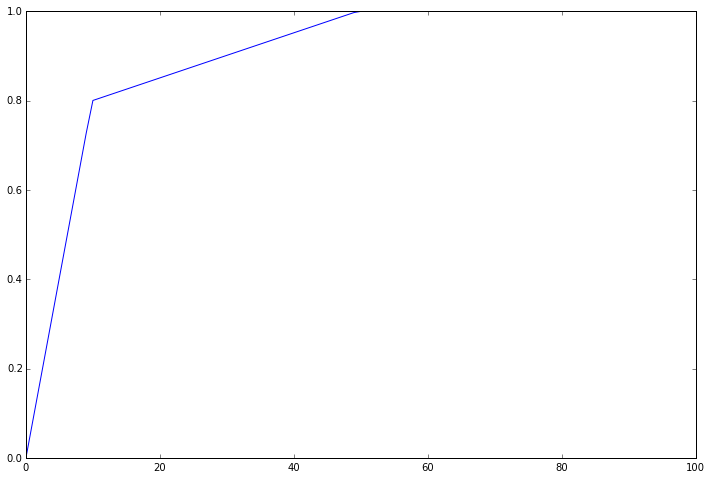

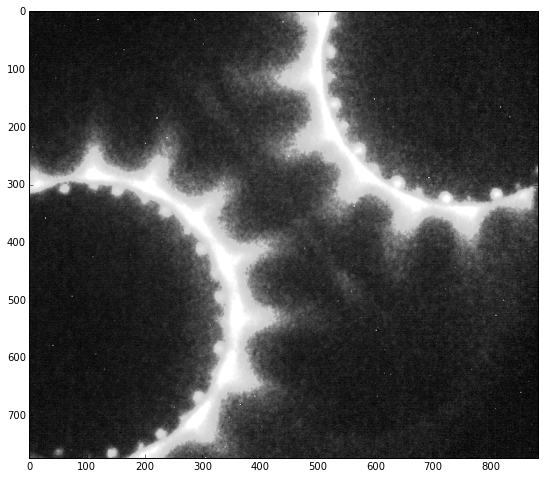

In [23]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(f(np.linspace(0,1.0,100)))
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(f(s_nn[3]), cmap='gray', clim=[0,1])

In [12]:
26/255

0.10196078431372549

# New Code

In [21]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
s=[]
for i in range(1,13):
    if i<10:
        st="0"+str(i)
    else:
        st=str(i)
    sh_fn=shot+" Shot_0"+st+".png" 
    sh_im=plt.imread(sh_fn)
    s.append(sh_im)

shfn=shot+" Shot"
ig.writeGif(shfn+'.gif',s, duration=0.2)